In [745]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl


In [746]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=2)

In [747]:
df = pd.read_excel('Fnt-FDE-data.xlsx')
df.head()

,Noofwatermol,Active6nots,Active6s,active6intermediate,Noactiveintermediate,Noinactivenots,No6inactives,supermolecule
0,0,183.892,183.729,183.729,183.130,183.348,183.130,184.273
1,10,184.055,183.919,183.946,183.783,183.890,183.674,184.273
2,20,184.110,184.100,184.100,183.891,183.920,183.783,184.273
3,30,184.082,184.055,184.082,184.000,184.000,183.892,184.273
4,40,184.218,184.164,184.218,184.000,184.030,183.892,184.273


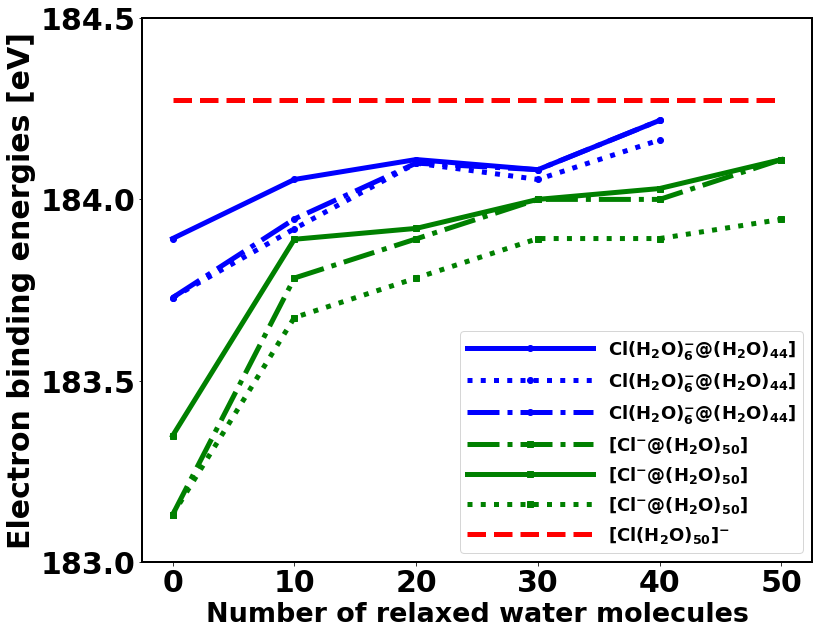

In [748]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6nots = df.Active6nots
Active6s = df.Active6s
active6intermediate = df.active6intermediate
Noactiveintermediate = df.Noactiveintermediate
Noinactivenots = df.Noinactivenots
No6inactives = df.No6inactives
supermolecule = df.supermolecule


plt.figure(figsize=(12,10))


plt.plot(Noofwatermol, Active6nots, color="blue", marker='o', linestyle='solid',label='Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Active6s, color="blue", marker='o', linestyle='dotted',label='Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, active6intermediate, color="blue", marker='o', linestyle='-.',label='Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Noactiveintermediate, color="green", marker='s', linestyle='-.',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]',linewidth=5)
plt.plot(Noofwatermol, Noinactivenots, color="green", marker='s', linestyle='solid',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(Noofwatermol, No6inactives, color="green", marker='s', linestyle='dotted',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(Noofwatermol, supermolecule, color="red", linestyle='--',label='[Cl(H$_{2}$O)$_{50}$]$^{-}$', linewidth=5)


plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(loc=4, prop={'size': 18}, handlelength=7)
plt.yticks(np.arange(183.0, 184.6, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=27, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.savefig('Fnt-Fde.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


In [749]:
df = pd.read_excel('CLUSTER-SIZES-0act-cl-n-hcl.xlsx')
df.head()

noofwater = df.noofwater
cl_x2c_acv3z_2p_1half = df.cl_x2c_acv3z_2p_1half
cl_x2c_acv3z_2p_3half = df.cl_x2c_acv3z_2p_3half
cl_x2c_acv3z_2p = df.cl_x2c_acv3z_2p

cl_x2c_acv4z_2p_1half = df.cl_x2c_acv4z_2p_1half
cl_x2c_acv4z_2p_3half = df.cl_x2c_acv4z_2p_3half
cl_x2c_acv4z_2p = df.cl_x2c_acv4z_2p


cl_x2c_d_acv3z_2p_1half = df.cl_x2c_d_acv3z_2p_1half
cl_x2c_d_acv3z_2p_3half = df.cl_x2c_d_acv3z_2p_3half
cl_x2c_d_acv3z_2p = df.cl_x2c_d_acv3z_2p


cl_x2c_d_acv4z_2p_1half = df.cl_x2c_d_acv4z_2p_1half
cl_x2c_d_acv4z_2p_3half = df.cl_x2c_d_acv4z_2p_3half
cl_x2c_d_acv4z_2p = df.cl_x2c_d_acv4z_2p


#cl_dc_acv3z_2p_1half = df.cl_dc_acv3z_2p_1half
#cl_dc_acv3z_2p_3half = df.cl_dc_acv3z_2p_3half
#cl_dc_acv3z_2p = df.cl_dc_acv3z_2p


In [750]:
df = pd.read_excel('CLUSTER-SIZES-1act.xlsx')
df.head()

X2CAMFSR = df.X2CAMFSR
X2CAMFSO = df.X2CAMFSO
X2CAMFSOonehalf = df.X2CAMFSOonehalf


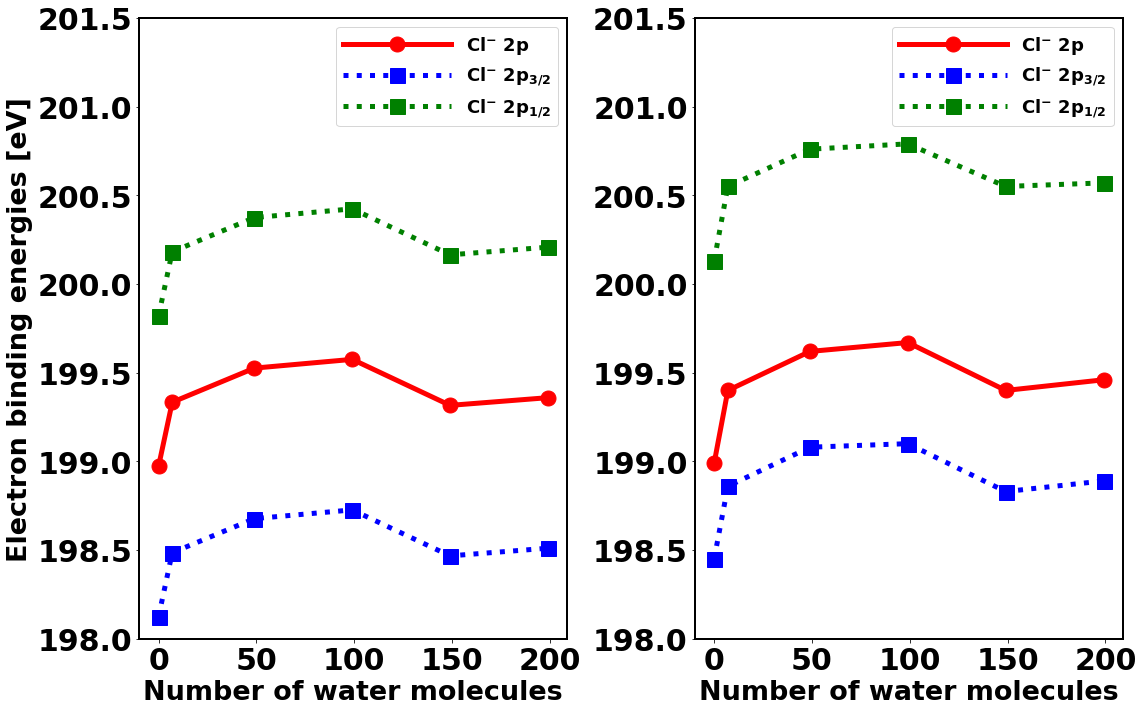

In [751]:
#Influence of different cluster sizes on the properties of Cl- at (ice 0 K) with ccsd
#Zero and one water added to the activesystem are compared for the 2p

f = plt.figure(figsize=(16,10))

ax1 = f.add_subplot(121)
plt.plot(noofwater, cl_x2c_acv3z_2p, color="red", marker='o', linestyle='solid', markersize=15, linewidth=5,label='Cl$^{-}$ 2p')
plt.plot(noofwater, cl_x2c_acv3z_2p_3half, color="blue", marker='s', linestyle='dotted', markersize=15, linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, cl_x2c_acv3z_2p_1half , color="green", marker='s', linestyle='dotted', markersize=15, linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')





plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=27, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=27, fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([198, 201.5])

ax2 = plt.subplot(122)
plt.plot(noofwater, X2CAMFSR, color="red", marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p')
plt.plot(noofwater, X2CAMFSO, color="blue", marker='s', markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, X2CAMFSOonehalf, color="green", marker='s', markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')



plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=27, fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([198, 201.5])


plt.tight_layout()
#plt.savefig('cl0h2o_n_cl1h2o.png', bbox_inches='tight', dpi=400)
plt.show()

In [752]:

ZORA1s = df.ZORA1s
ZORA2s = df.ZORA2s
ZORAo1s = df.ZORAo1s
ZORASR = df.ZORASR
ZORASO = df.ZORASO

ZORASOonehalf = df.ZORASOonehalf
X2CAMF1s = df.X2CAMF1s
X2CAMF2s = df.X2CAMF2s
X2CAMFo1s = df.X2CAMFo1s
X2CAMFSR = df.X2CAMFSR
X2CAMFSO = df.X2CAMFSO
X2CAMFSOonehalf = df.X2CAMFSOonehalf


hclZORA1s = df.hclZORA1s
hclZORA2s = df.hclZORA2s
hclZORAo1s = df.hclZORAo1s
hclZORASR = df.hclZORASR
hclZORASO = df.hclZORASO
hclZORASOonehalf = df.hclZORASOonehalf
hclX2CAMF1s = df.hclX2CAMF1s
hclX2CAMF2s = df.hclX2CAMF2s
hclX2CAMFo1s = df.hclX2CAMFo1s
hclX2CAMFSR = df.hclX2CAMFSR
hclX2CAMFSO = df.hclX2CAMFSO
hclX2CAMFSOonehalf = df.hclX2CAMFSOonehalf


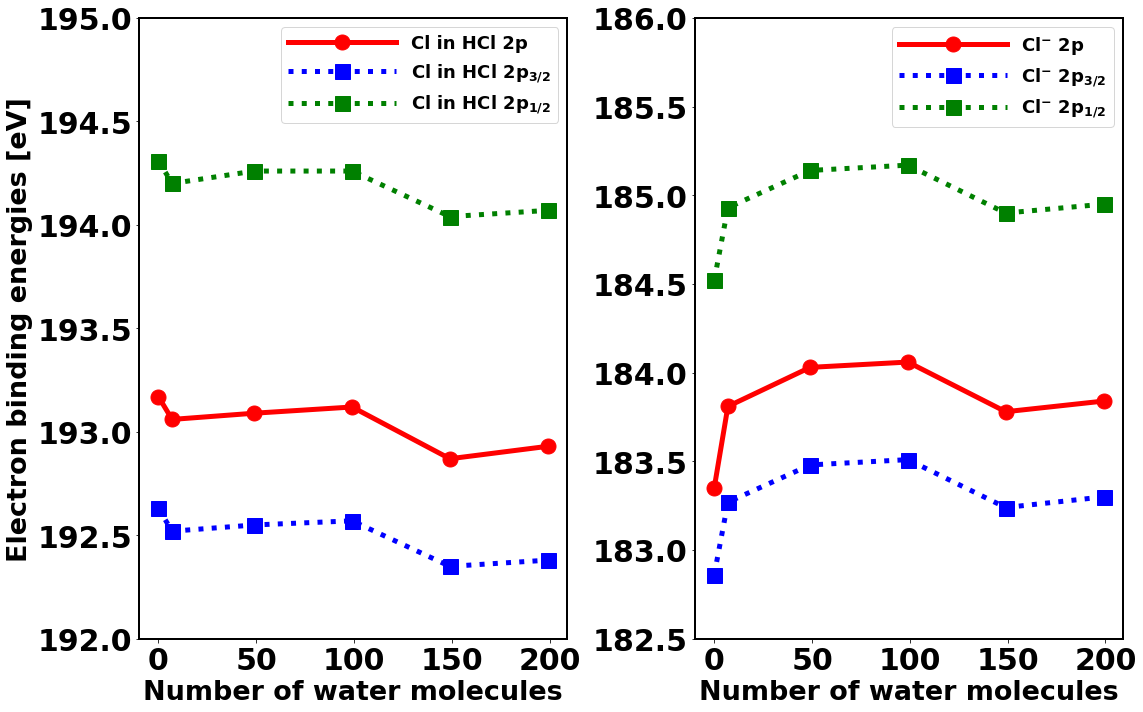

In [753]:
#Influence of different cluster sizes on the properties of HCl and Cl- at (ice 0 K) with saop, 2p are compared

f = plt.figure(figsize=(16,10))

ax1 = f.add_subplot(121)
plt.plot(noofwater, hclZORASR, color="red", marker='o',  markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 2p')
plt.plot(noofwater, hclZORASO, color="blue", marker='s',  markersize=15, linestyle='dotted', linewidth=5,label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, hclZORASOonehalf, color="green", marker='s',  markersize=15, linestyle='dotted', linewidth=5,label='Cl in HCl 2p$_{1/2}$')

plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=27, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=27,  fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([192.0, 195])

ax2 = plt.subplot(122)
plt.plot(noofwater, ZORASR, color="red", marker='o',  markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p')
plt.plot(noofwater, ZORASO, color="blue", marker='s',  markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, ZORASOonehalf, color="green", marker='s',  markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')


plt.ylim([182.5, 186])
plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xlabel('Number of water molecules', fontsize=27, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))



plt.tight_layout()
#plt.savefig('ZORA-SAOP-cl-hcl-2p.png', bbox_inches='tight', dpi=400)
plt.show()

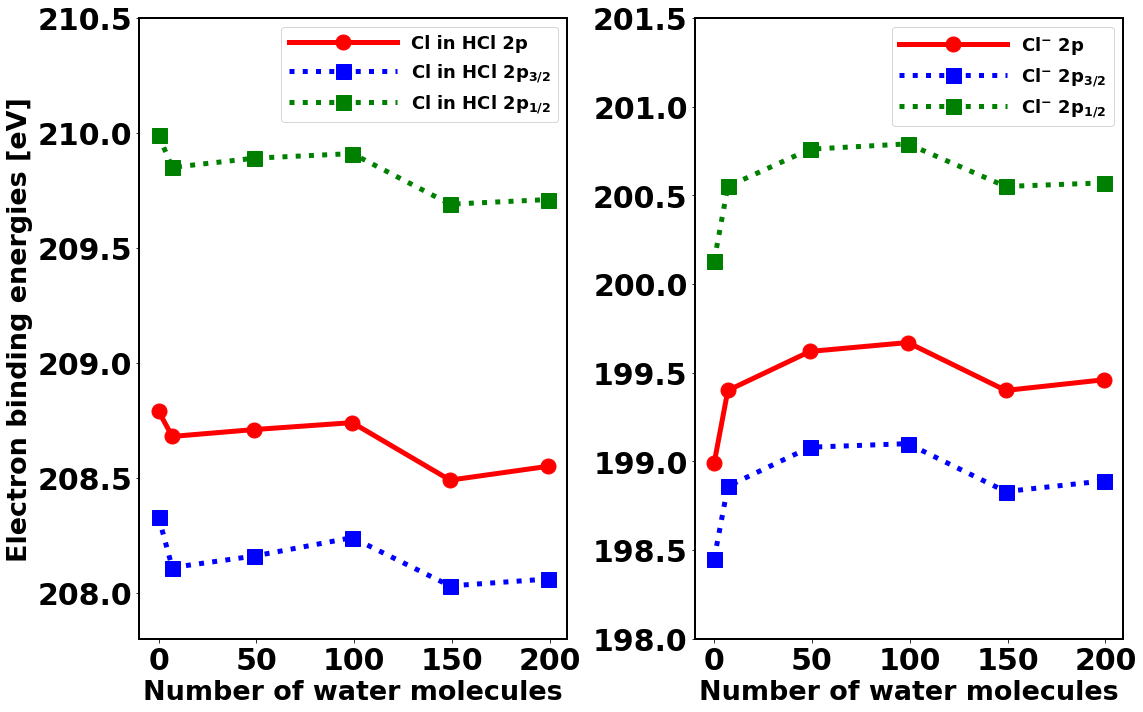

In [754]:
#Influence of different cluster sizes on the properties of HCl and Cl- at (ice 0 K) with ccsd, 2p are compared

f = plt.figure(figsize=(16,10))

ax1 = f.add_subplot(121)
plt.plot(noofwater, hclX2CAMFSR, color="red", marker='o', linestyle='solid', markersize=15, linewidth=5,label='Cl in HCl 2p')
plt.plot(noofwater, hclX2CAMFSO, color="blue", marker='s', linestyle='dotted', markersize=15, linewidth=5,label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, hclX2CAMFSOonehalf, color="green", marker='s', linestyle='dotted', markersize=15, linewidth=5,label='Cl in HCl 2p$_{1/2}$')



plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=27, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=27, fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([207.8, 210.5])

ax2 = plt.subplot(122)
plt.plot(noofwater, X2CAMFSR, color="red", marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p')
plt.plot(noofwater, X2CAMFSO, color="blue", marker='s', markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, X2CAMFSOonehalf, color="green", marker='s', markersize=15, linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')




plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(loc=1, prop={'size': 18}, handlelength=6)
plt.xlabel('Number of water molecules', fontsize=27, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([198, 201.5])


plt.tight_layout()
#plt.savefig('X2C-EOM-cl-hcl-2p.png', bbox_inches='tight', dpi=400)
plt.show()

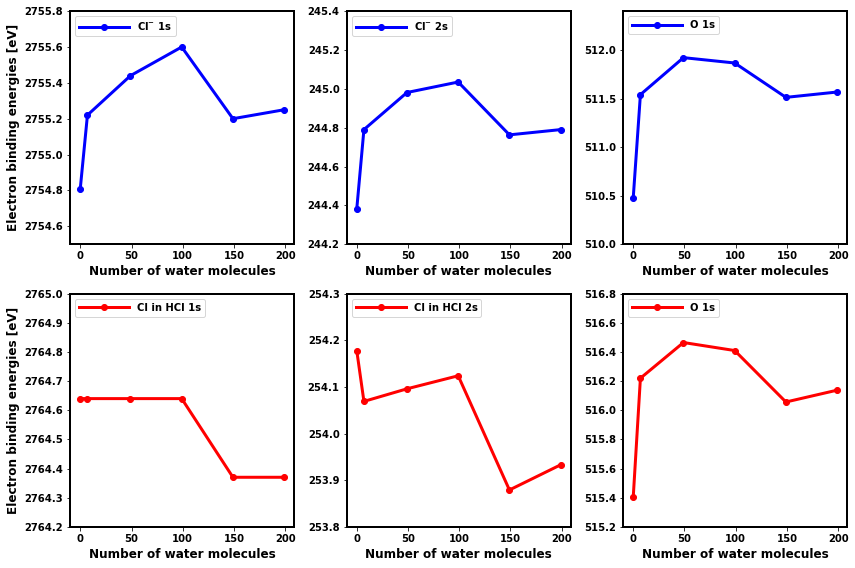

In [755]:
#Influence of different cluster sizes on the properties of HCl and Cl- at (ice 0 K) with saop, Cl 1s, 2s and O is are compared

f = plt.figure(figsize=(12,8))

ax1 = f.add_subplot(231)

ax1.plot(noofwater, ZORA1s, color="blue", marker='o', linestyle='solid', linewidth=3,label='Cl$^{-}$ 1s')

plt.ylabel('Electron binding energies [eV]', fontsize=12, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([2754.5, 2755.8])


ax2 = plt.subplot(232)
plt.plot(noofwater, ZORA2s, color="blue", marker='o', linestyle='solid', linewidth=3,label='Cl$^{-}$ 2s')

plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([244.2, 245.4])

ax3 = plt.subplot(233)
plt.plot(noofwater, ZORAo1s, color="blue", marker='o', linestyle='solid', linewidth=3,label='O 1s')

plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.ylim([510, 512.4])
plt.xticks(np.arange(0, 205, 50))

ax4 = plt.subplot(234)
plt.plot(noofwater, hclZORA1s, color="red", marker='o', linestyle='solid', linewidth=3,label='Cl in HCl 1s')

plt.ylabel('Electron binding energies [eV]', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([2764.2, 2765.0])


ax5 = plt.subplot(235)
plt.plot(noofwater, hclZORA2s, color="red", marker='o', linestyle='solid', linewidth=3,label='Cl in HCl 2s')

plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([253.8, 254.30])


ax6 = plt.subplot(236)
plt.plot(noofwater, hclZORAo1s, color="red", marker='o', linestyle='solid', linewidth=3,label='O 1s')

plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([515.2, 516.8])






plt.tight_layout()
#plt.savefig('cl-hclsaop_1s-2s-o1s.png', bbox_inches='tight', dpi=400)
plt.show()

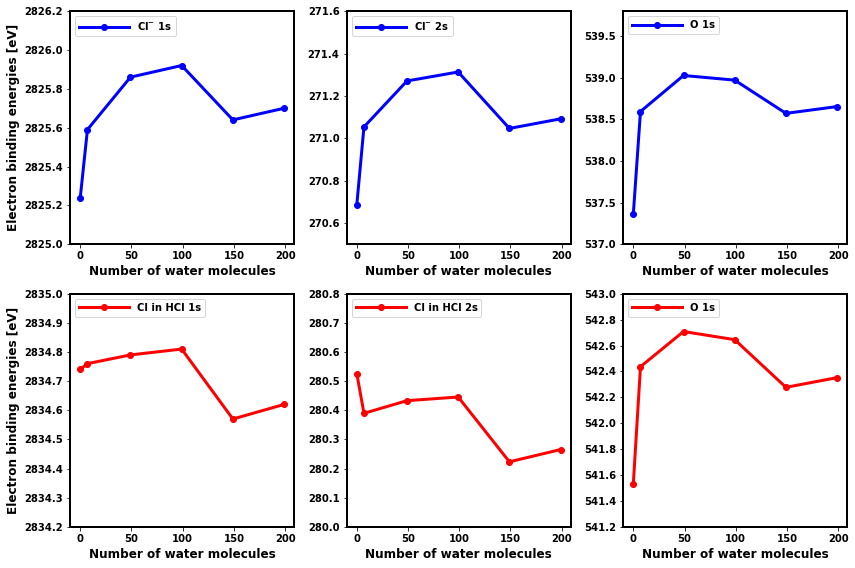

In [756]:
#Influence of different cluster sizes on the properties of HCl and Cl- at (ice 0 K) with ccsd, Cl 1s, 2s and O is are compared

f = plt.figure(figsize=(12,8))

ax1 = f.add_subplot(231)

ax1.plot(noofwater, X2CAMF1s, color="blue", marker='o', linestyle='solid', linewidth=3,label='Cl$^{-}$ 1s')


plt.ylabel('Electron binding energies [eV]', fontsize=12, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xticks(np.arange(0, 205, 50))
plt.ylim([2825, 2826.2])


ax2 = plt.subplot(232)

plt.plot(noofwater, X2CAMF2s, color="blue", marker='o', linestyle='solid', linewidth=3,label='Cl$^{-}$ 2s')

plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([270.5, 271.6])

ax3 = plt.subplot(233)
plt.plot(noofwater, X2CAMFo1s, color="blue", marker='o', linestyle='solid', linewidth=3,label='O 1s')

plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.ylim([537, 539.8])
plt.xticks(np.arange(0, 205, 50))

ax4 = plt.subplot(234)
plt.plot(noofwater, hclX2CAMF1s, color="red", marker='o', linestyle='solid', linewidth=3,label='Cl in HCl 1s')

plt.ylabel('Electron binding energies [eV]', fontsize=12, fontweight='bold')
plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([2834.2, 2835])


ax5 = plt.subplot(235)
plt.plot(noofwater, hclX2CAMF2s, color="red", marker='o', linestyle='solid', linewidth=3,label='Cl in HCl 2s')


plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([280, 280.80])


ax6 = plt.subplot(236)
plt.plot(noofwater, hclX2CAMFo1s, color="red", marker='o', linestyle='solid', linewidth=3,label='O 1s')


plt.legend(loc=2, prop={'size': 10}, handlelength=5)
plt.xlabel('Number of water molecules', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 205, 50))
plt.ylim([541.2, 543.0])




plt.tight_layout()
#plt.savefig('cl-hclccsd_1s-2s-o1s.png', bbox_inches='tight', dpi=400)
plt.show()

In [757]:
df = pd.read_excel('cl_0_1_6_water_added_in_ice_saop.xlsx', skiprows=3)
df.head()

,Unnamed: 0,cl_1s_saop_0water_in_active,Unnamed: 2,Unnamed: 3,cl_2s_saop_0water_in_active,Unnamed: 5,Unnamed: 6,cl_2p_saop_0water_in_active,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,cl_1s_b3lyp_6water_in_active,Unnamed: 40,Unnamed: 41,cl_2s_b3lyp_6water_in_active,Unnamed: 43,Unnamed: 44,cl_2p_b3lyp_6water_in_active
0,NaN,2754.052521,NaN,NaN,243.511239,NaN,NaN,182.803498,NaN,NaN,...,NaN,NaN,NaN,2774.176416,NaN,NaN,250.985557,NaN,NaN,188.418229
1,NaN,2755.331438,NaN,NaN,244.790156,NaN,NaN,184.096021,NaN,NaN,...,NaN,NaN,NaN,2773.010425,NaN,NaN,249.775211,NaN,NaN,187.212047
2,NaN,2754.515108,NaN,NaN,243.946615,NaN,NaN,183.252479,NaN,NaN,...,NaN,NaN,NaN,2773.145391,NaN,NaN,249.919457,NaN,NaN,187.355204
3,NaN,2755.086539,NaN,NaN,244.518046,NaN,NaN,183.837516,NaN,NaN,...,NaN,NaN,NaN,2773.752741,NaN,NaN,250.518480,NaN,NaN,187.954540
4,NaN,2755.603548,NaN,NaN,245.035055,NaN,NaN,184.368131,NaN,NaN,...,NaN,NaN,NaN,2773.998184,NaN,NaN,250.775488,NaN,NaN,188.211684


mean_0water = 183.66608670000002
mean_1water = 183.696290916
mean_6water = 183.783094
std_0water = 0.4842640688417024
std_1water = 0.35116046159333864
std_6waters = 0.455294595113053


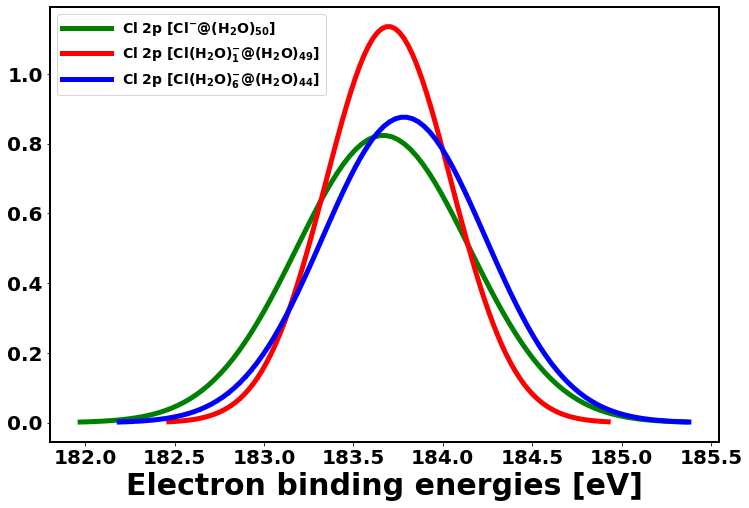

In [758]:
#Comparison between 0,1 and 6 water added to the activesystem and interacting with 50, 49, and 44 water molecules

cl_2p_saop_0water_in_active = df.cl_2p_saop_0water_in_active
cl_2p_saop_1water_in_active = df.cl_2p_saop_1water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



zero_water_in_active_cl_2p = np.array(cl_2p_saop_0water_in_active)
one_water_in_active_cl_2p  = np.array(cl_2p_saop_1water_in_active)
six_water_in_active_cl_2p  = np.array(cl_2p_saop_6water_in_active)


mean_zero_water_in_active_cl_2p = np.mean(zero_water_in_active_cl_2p)
print("mean_0water =", mean_zero_water_in_active_cl_2p)
mean_one_water_in_active_cl_2p = np.mean(one_water_in_active_cl_2p)
print("mean_1water =", mean_one_water_in_active_cl_2p )
mean_six_water_in_active_cl_2p  = np.mean(six_water_in_active_cl_2p)
print("mean_6water =", mean_six_water_in_active_cl_2p )


std_zero_water_in_active_cl_2p = np.std(zero_water_in_active_cl_2p)
print("std_0water =", std_zero_water_in_active_cl_2p)
std_one_water_in_active_cl_2p  = np.std(one_water_in_active_cl_2p)
print("std_1water =", std_one_water_in_active_cl_2p)
std_six_water_in_active_cl_2p  = np.std(six_water_in_active_cl_2p )
print("std_6waters =", std_six_water_in_active_cl_2p)


zero_water_in_active_cl_2p_BE = np.linspace(mean_zero_water_in_active_cl_2p - 3.5*std_zero_water_in_active_cl_2p , mean_zero_water_in_active_cl_2p + 3.5*std_zero_water_in_active_cl_2p, 100)
one_water_in_active_cl_2p_BE = np.linspace(mean_one_water_in_active_cl_2p - 3.5*std_one_water_in_active_cl_2p, mean_one_water_in_active_cl_2p + 3.5*std_one_water_in_active_cl_2p, 100)
six_water_in_active_cl_2p_BE =  np.linspace(mean_six_water_in_active_cl_2p - 3.5*std_six_water_in_active_cl_2p, mean_six_water_in_active_cl_2p + 3.5*std_six_water_in_active_cl_2p, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(zero_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(zero_water_in_active_cl_2p_BE, mean_zero_water_in_active_cl_2p, std_zero_water_in_active_cl_2p), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p [Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(one_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(one_water_in_active_cl_2p_BE, mean_one_water_in_active_cl_2p, std_one_water_in_active_cl_2p),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{1}$@(H$_{2}$O)$_{49}$]', linewidth=5)
plt.plot(six_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(six_water_in_active_cl_2p_BE, mean_six_water_in_active_cl_2p, std_six_water_in_active_cl_2p), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)

#plt.ylim([0.1, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl50_0_1_6_saop-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

mean_6water_pbe = 182.063301676
mean_6water_b3lyp = 187.810319824
mean_6water_saop = 183.783094
std_6water_pbe = 0.4209627179235856
std_6water_b3lyp = 0.42383783968514216
std_6waters_saop = 0.455294595113053


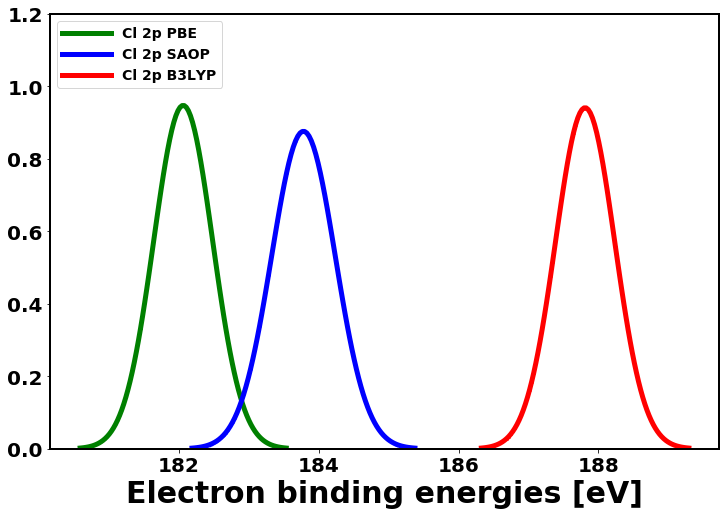

In [759]:
#Comparison between functionals (pbe, b3lyp and saop); 6 water added to the activesystem and interacting with 44 water molecules

cl_2p_pbe_6water_in_active = df.cl_2p_pbe_6water_in_active
cl_2p_b3lyp_6water_in_active = df.cl_2p_b3lyp_6water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



six_cl_2p_pbe_6water_in_active = np.array(cl_2p_pbe_6water_in_active)
six_cl_2p_b3lyp_6water_in_active  = np.array(cl_2p_b3lyp_6water_in_active)
six_cl_2p_saop_6water_in_active  = np.array(cl_2p_saop_6water_in_active)


mean_six_cl_2p_pbe_6water_in_active  = np.mean(six_cl_2p_pbe_6water_in_active )
print("mean_6water_pbe =", mean_six_cl_2p_pbe_6water_in_active)
mean_six_cl_2p_b3lyp_6water_in_active = np.mean(six_cl_2p_b3lyp_6water_in_active)
print("mean_6water_b3lyp =", mean_six_cl_2p_b3lyp_6water_in_active)
mean_six_cl_2p_saop_6water_in_active  = np.mean(six_cl_2p_saop_6water_in_active)
print("mean_6water_saop =", mean_six_cl_2p_saop_6water_in_active)


std_six_cl_2p_pbe_6water_in_active  = np.std(six_cl_2p_pbe_6water_in_active)
print("std_6water_pbe =", std_six_cl_2p_pbe_6water_in_active)
std_six_cl_2p_b3lyp_6water_in_active  = np.std(six_cl_2p_b3lyp_6water_in_active)
print("std_6water_b3lyp =", std_six_cl_2p_b3lyp_6water_in_active)
std_six_cl_2p_saop_6water_in_active   = np.std(six_cl_2p_saop_6water_in_active)
print("std_6waters_saop =", std_six_cl_2p_saop_6water_in_active)


six_cl_2p_pbe_6water_in_active_BE = np.linspace(mean_six_cl_2p_pbe_6water_in_active - 3.5*std_six_cl_2p_pbe_6water_in_active, mean_six_cl_2p_pbe_6water_in_active + 3.5*std_six_cl_2p_pbe_6water_in_active, 100)
six_cl_2p_b3lyp_6water_in_active_BE = np.linspace(mean_six_cl_2p_b3lyp_6water_in_active - 3.5*std_six_cl_2p_b3lyp_6water_in_active, mean_six_cl_2p_b3lyp_6water_in_active + 3.5*std_six_cl_2p_b3lyp_6water_in_active, 100)
six_cl_2p_saop_6water_in_active_BE =  np.linspace(mean_six_cl_2p_saop_6water_in_active - 3.5*std_six_cl_2p_saop_6water_in_active, mean_six_cl_2p_saop_6water_in_active + 3.5*std_six_cl_2p_saop_6water_in_active, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(six_cl_2p_pbe_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_pbe_6water_in_active_BE, mean_six_cl_2p_pbe_6water_in_active, std_six_cl_2p_pbe_6water_in_active), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p PBE', linewidth=5)
plt.plot(six_cl_2p_saop_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_saop_6water_in_active_BE, mean_six_cl_2p_saop_6water_in_active, std_six_cl_2p_saop_6water_in_active), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p SAOP', linewidth=5)
plt.plot(six_cl_2p_b3lyp_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_b3lyp_6water_in_active_BE, mean_six_cl_2p_b3lyp_6water_in_active, std_six_cl_2p_b3lyp_6water_in_active),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p B3LYP', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl50_6_pbe_b3lyp_saop-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

In [760]:
df = pd.read_excel('gas_phase_hcl_ccsd.xlsx', skiprows=3)
df.head()

,Unnamed: 0,Gasphase_1s_hcl_acv3z_x2camf,Unnamed: 2,Gasphase_2s_hcl_acv3z_x2camf,Unnamed: 4,Gasphase_p_hcl_acv3z_x2camf,Unnamed: 6,Gasphase_p12_hcl_acv3z_x2camf,Unnamed: 8,Gasphase_p32_hcl_acv3z_x2camf,Unnamed: 10,Unnamed: 11,Gasphase_p_hcl_acv3z_dc,Unnamed: 13,Unnamed: 14,Gasphase_p_hcl_d_aug_acv3z_x2camf,Unnamed: 16,Unnamed: 17,Gasphase_p_hcl_d_aug_acv4z_x2camf
0,NaN,2837.740399,NaN,280.295484,NaN,208.894295,NaN,209.743236,NaN,208.045354,NaN,NaN,208.914870,NaN,NaN,208.897661,NaN,NaN,208.898231
1,NaN,2837.740401,NaN,280.295483,NaN,208.894294,NaN,209.743235,NaN,208.045353,NaN,NaN,208.914869,NaN,NaN,208.897660,NaN,NaN,208.898231
2,NaN,2837.740397,NaN,280.295485,NaN,208.894295,NaN,209.743236,NaN,208.045355,NaN,NaN,208.914871,NaN,NaN,208.897662,NaN,NaN,208.898232
3,NaN,2837.740397,NaN,280.295485,NaN,208.894295,NaN,209.743236,NaN,208.045354,NaN,NaN,208.914869,NaN,NaN,208.897662,NaN,NaN,208.898232
4,NaN,2837.740400,NaN,280.295483,NaN,208.894294,NaN,209.743235,NaN,208.045353,NaN,NaN,208.914870,NaN,NaN,208.897661,NaN,NaN,208.898231


mean_Gasphase_p_hcl_acv3z_x2camf = 208.89575482799998
mean_Gasphase_p_hcl_d_aug_acv3z_x2camf = 208.898291776
mean_Gasphase_p_hcl_d_aug_acv4z_x2camf= 208.898903584
std_Gasphase_p_hcl_acv3z_x2camf = 0.005008629572131229
std_Gasphase_p_hcl_d_aug_acv3z_x2camf= 0.0030927920116677592
std_Gasphase_p_hcl_d_aug_acv4z_x2camf = 0.0032958326694983785


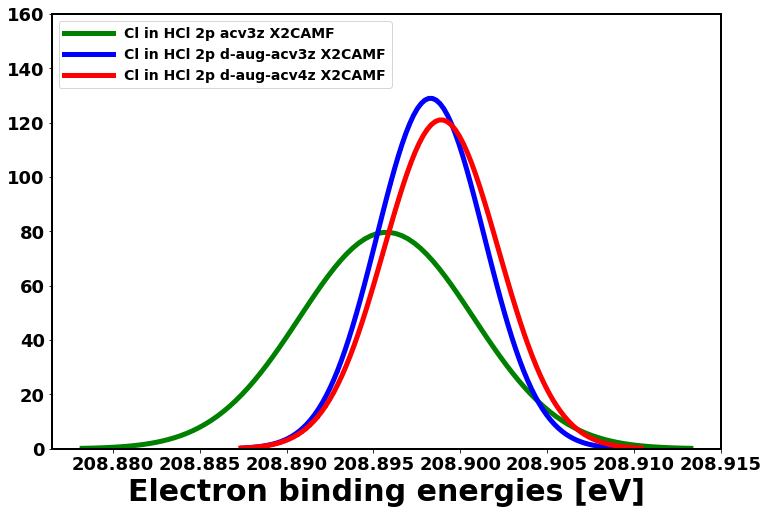

In [761]:
#Gas phase HCl: 2p with ccsd using different basis basis sets 

Gasphase_p_hcl_acv3z_x2camf = df.Gasphase_p_hcl_acv3z_x2camf
Gasphase_p_hcl_d_aug_acv3z_x2camf = df.Gasphase_p_hcl_d_aug_acv3z_x2camf
Gasphase_p_hcl_d_aug_acv4z_x2camf = df.Gasphase_p_hcl_d_aug_acv4z_x2camf



Gasphase_p_hcl_acv3z_x2camf = np.array(Gasphase_p_hcl_acv3z_x2camf)
Gasphase_p_hcl_d_aug_acv3z_x2camf  = np.array(Gasphase_p_hcl_d_aug_acv3z_x2camf)
Gasphase_p_hcl_d_aug_acv4z_x2camf = np.array(Gasphase_p_hcl_d_aug_acv4z_x2camf)


mean_Gasphase_p_hcl_acv3z_x2camf = np.mean(Gasphase_p_hcl_acv3z_x2camf)
print("mean_Gasphase_p_hcl_acv3z_x2camf =", mean_Gasphase_p_hcl_acv3z_x2camf)
mean_Gasphase_p_hcl_d_aug_acv3z_x2camf = np.mean(Gasphase_p_hcl_d_aug_acv3z_x2camf)
print("mean_Gasphase_p_hcl_d_aug_acv3z_x2camf =", mean_Gasphase_p_hcl_d_aug_acv3z_x2camf)
mean_Gasphase_p_hcl_d_aug_acv4z_x2camf  = np.mean(Gasphase_p_hcl_d_aug_acv4z_x2camf)
print("mean_Gasphase_p_hcl_d_aug_acv4z_x2camf=", mean_Gasphase_p_hcl_d_aug_acv4z_x2camf)


std_Gasphase_p_hcl_acv3z_x2camf  = np.std(Gasphase_p_hcl_acv3z_x2camf)
print("std_Gasphase_p_hcl_acv3z_x2camf =", std_Gasphase_p_hcl_acv3z_x2camf)
std_Gasphase_p_hcl_d_aug_acv3z_x2camf = np.std(Gasphase_p_hcl_d_aug_acv3z_x2camf)
print("std_Gasphase_p_hcl_d_aug_acv3z_x2camf=", std_Gasphase_p_hcl_d_aug_acv3z_x2camf)
std_Gasphase_p_hcl_d_aug_acv4z_x2camf = np.std(Gasphase_p_hcl_d_aug_acv4z_x2camf)
print("std_Gasphase_p_hcl_d_aug_acv4z_x2camf =", std_Gasphase_p_hcl_d_aug_acv4z_x2camf)


Gasphase_p_hcl_acv3z_x2camf_BE = np.linspace(mean_Gasphase_p_hcl_acv3z_x2camf - 3.5*std_Gasphase_p_hcl_acv3z_x2camf, mean_Gasphase_p_hcl_acv3z_x2camf + 3.5*std_Gasphase_p_hcl_acv3z_x2camf, 100)
Gasphase_p_hcl_d_aug_acv3z_x2camf_BE = np.linspace(mean_Gasphase_p_hcl_d_aug_acv3z_x2camf - 3.5*std_Gasphase_p_hcl_d_aug_acv3z_x2camf, mean_Gasphase_p_hcl_d_aug_acv3z_x2camf + 3.5*std_Gasphase_p_hcl_d_aug_acv3z_x2camf, 100)
Gasphase_p_hcl_d_aug_acv4z_x2camf_BE =  np.linspace(mean_Gasphase_p_hcl_d_aug_acv4z_x2camf - 3.5*std_Gasphase_p_hcl_d_aug_acv4z_x2camf, mean_Gasphase_p_hcl_d_aug_acv4z_x2camf + 3.5*std_Gasphase_p_hcl_d_aug_acv4z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Gasphase_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Gasphase_p_hcl_acv3z_x2camf_BE, mean_Gasphase_p_hcl_acv3z_x2camf, std_Gasphase_p_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p acv3z X2CAMF', linewidth=5)
plt.plot(Gasphase_p_hcl_d_aug_acv3z_x2camf_BE, scipy.stats.norm.pdf(Gasphase_p_hcl_d_aug_acv3z_x2camf_BE, mean_Gasphase_p_hcl_d_aug_acv3z_x2camf, std_Gasphase_p_hcl_d_aug_acv3z_x2camf), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl in HCl 2p d-aug-acv3z X2CAMF', linewidth=5)
plt.plot(Gasphase_p_hcl_d_aug_acv4z_x2camf_BE, scipy.stats.norm.pdf(Gasphase_p_hcl_d_aug_acv4z_x2camf_BE, mean_Gasphase_p_hcl_d_aug_acv4z_x2camf, std_Gasphase_p_hcl_d_aug_acv4z_x2camf),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl in HCl 2p d-aug-acv4z X2CAMF', linewidth=5)

plt.ylim([0.0, 160])
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('Gas_phase_hcl_compare_basissets_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()




mean_Gasphase_p_hcl_acv3z_x2camf = 208.89575482799998
mean_Gasphase_p_hcl_acv3z_dc = 208.91549705999998
std_Gasphase_p_hcl_acv3z_x2camf = 0.005008629572131229
std_Gasphase_p_hcl_acv3z_dc = 0.0030754651390629416


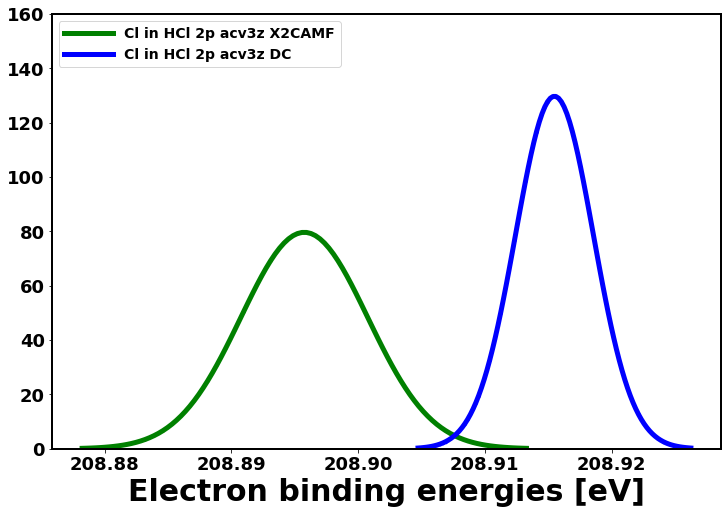

In [762]:
#Gas phase HCl: 2p with ccsd using different Hamiltonian

Gasphase_p_hcl_acv3z_x2camf = df.Gasphase_p_hcl_acv3z_x2camf
Gasphase_p_hcl_acv3z_dc = df.Gasphase_p_hcl_acv3z_dc




Gasphase_p_hcl_acv3z_x2camf = np.array(Gasphase_p_hcl_acv3z_x2camf)
Gasphase_p_hcl_acv3z_dc  = np.array(Gasphase_p_hcl_acv3z_dc)



mean_Gasphase_p_hcl_acv3z_x2camf = np.mean(Gasphase_p_hcl_acv3z_x2camf)
print("mean_Gasphase_p_hcl_acv3z_x2camf =", mean_Gasphase_p_hcl_acv3z_x2camf)
mean_Gasphase_p_hcl_acv3z_dc = np.mean(Gasphase_p_hcl_acv3z_dc)
print("mean_Gasphase_p_hcl_acv3z_dc =", mean_Gasphase_p_hcl_acv3z_dc)



std_Gasphase_p_hcl_acv3z_x2camf  = np.std(Gasphase_p_hcl_acv3z_x2camf)
print("std_Gasphase_p_hcl_acv3z_x2camf =", std_Gasphase_p_hcl_acv3z_x2camf)
std_Gasphase_p_hcl_acv3z_dc = np.std(Gasphase_p_hcl_acv3z_dc)
print("std_Gasphase_p_hcl_acv3z_dc =", std_Gasphase_p_hcl_acv3z_dc)

Gasphase_p_hcl_acv3z_x2camf_BE = np.linspace(mean_Gasphase_p_hcl_acv3z_x2camf - 3.5*std_Gasphase_p_hcl_acv3z_x2camf, mean_Gasphase_p_hcl_acv3z_x2camf + 3.5*std_Gasphase_p_hcl_acv3z_x2camf, 100)
Gasphase_p_hcl_acv3z_dc_BE = np.linspace(mean_Gasphase_p_hcl_acv3z_dc - 3.5*std_Gasphase_p_hcl_acv3z_dc, mean_Gasphase_p_hcl_acv3z_dc + 3.5*std_Gasphase_p_hcl_acv3z_dc, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Gasphase_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Gasphase_p_hcl_acv3z_x2camf_BE, mean_Gasphase_p_hcl_acv3z_x2camf, std_Gasphase_p_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p acv3z X2CAMF', linewidth=5)
plt.plot(Gasphase_p_hcl_acv3z_dc_BE, scipy.stats.norm.pdf(Gasphase_p_hcl_acv3z_dc_BE, mean_Gasphase_p_hcl_acv3z_dc, std_Gasphase_p_hcl_acv3z_dc), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl in HCl 2p acv3z DC', linewidth=5)

plt.ylim([0.0, 160])
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('Gas_phase_hcl_compare_hamiltonians_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()






In [763]:
df = pd.read_excel('embedded_hcl_on_ice_single_water_to_hcl_ccsd.xlsx', skiprows=3)
df.head()

,Unnamed: 0,Embedded_one_water_1s_hcl_acv3z_x2camf,Unnamed: 2,Unnamed: 3,Unnamed: 4,Embedded_one_water_2s_hcl_acv3z_x2camf,Unnamed: 6,Unnamed: 7,Unnamed: 8,Embedded_one_water_p_hcl_acv3z_x2camf,Unnamed: 10,Unnamed: 11,Unnamed: 12,Embedded_one_water_p12_hcl_acv3z_x2camf,Unnamed: 14,Unnamed: 15,Unnamed: 16,Embedded_one_water_p32_hcl_acv3z_x2camf
0,NaN,2836.781661,NaN,NaN,NaN,279.336783,NaN,NaN,NaN,208.164329,NaN,NaN,NaN,208.793642,NaN,NaN,NaN,207.135107
1,NaN,2837.447288,NaN,NaN,NaN,280.025949,NaN,NaN,NaN,208.199962,NaN,NaN,NaN,209.480037,NaN,NaN,NaN,207.782850
2,NaN,2837.291783,NaN,NaN,NaN,279.853097,NaN,NaN,NaN,208.235595,NaN,NaN,NaN,209.307189,NaN,NaN,NaN,207.609758
3,NaN,2837.696425,NaN,NaN,NaN,280.252477,NaN,NaN,NaN,208.271228,NaN,NaN,NaN,209.705356,NaN,NaN,NaN,208.007571
4,NaN,2837.946064,NaN,NaN,NaN,280.522917,NaN,NaN,NaN,208.306861,NaN,NaN,NaN,209.979774,NaN,NaN,NaN,208.282637


[2836.781661 2837.447288 2837.291783 2837.696425 2837.946064 2836.605665
 2837.322126 2838.059749 2837.062101 2837.365931 2837.71071  2836.920294
 2836.927129 2837.769858 2837.675218 2837.115291 2837.875237 2836.938625
 2837.056579 2837.282172 2837.779871 2837.766114 2838.065095 2837.202123
 2837.874716]
mean_Embedded_one_water_1s_hcl_acv3z_x2camf = 2837.421513
std_Embedded_one_water_1s_hcl_acv3z_x2camf = 0.4175173194072836


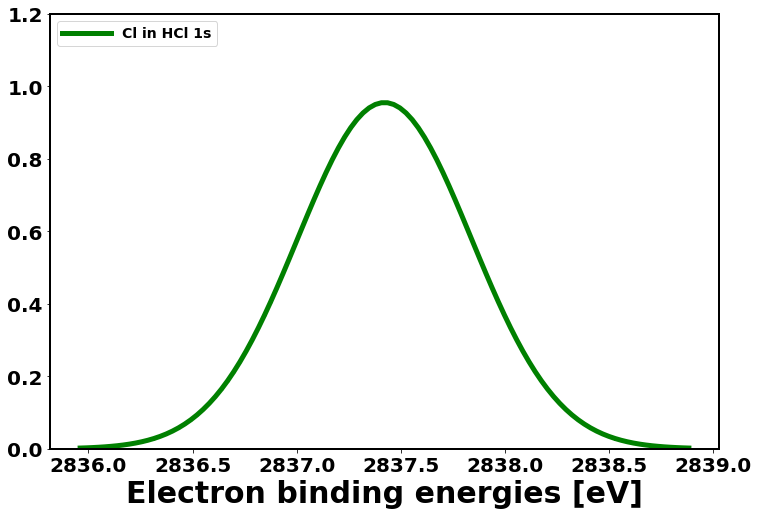

In [764]:
#HCl adsorbed on ice, one water molecule added to the HCl : 1s with ccsd x2camf and acv3z basis set

Embedded_one_water_1s_hcl_acv3z_x2camf = df.Embedded_one_water_1s_hcl_acv3z_x2camf

Embedded_one_water_1s_hcl_acv3z_x2camf = np.array(Embedded_one_water_1s_hcl_acv3z_x2camf)
print(Embedded_one_water_1s_hcl_acv3z_x2camf)

mean_Embedded_one_water_1s_hcl_acv3z_x2camf = np.mean(Embedded_one_water_1s_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_1s_hcl_acv3z_x2camf =", mean_Embedded_one_water_1s_hcl_acv3z_x2camf)



std_Embedded_one_water_1s_hcl_acv3z_x2camf  = np.std(Embedded_one_water_1s_hcl_acv3z_x2camf)
print("std_Embedded_one_water_1s_hcl_acv3z_x2camf =", std_Embedded_one_water_1s_hcl_acv3z_x2camf)


Embedded_one_water_1s_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_1s_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_1s_hcl_acv3z_x2camf, mean_Embedded_one_water_1s_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_1s_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_1s_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_1s_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_1s_hcl_acv3z_x2camf, std_Embedded_one_water_1s_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 1s', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-1s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[279.3367834 280.025949  279.8530966 280.2524768 280.5229166 279.1687677
 279.8776619 280.6252509 279.6241879 279.9315788 280.2842459 279.4871786
 279.4903462 280.3604111 280.1942716 279.6770482 279.8776619 279.5043901
 279.6265234 279.8408786 280.3329264 280.3194425 280.6242324 279.73535
 280.4211417]
mean_Embedded_one_water_2s_hcl_acv3z_x2camf = 279.959788728
std_Embedded_one_water_2s_hcl_acv3z_x2camf = 0.4075514792654437


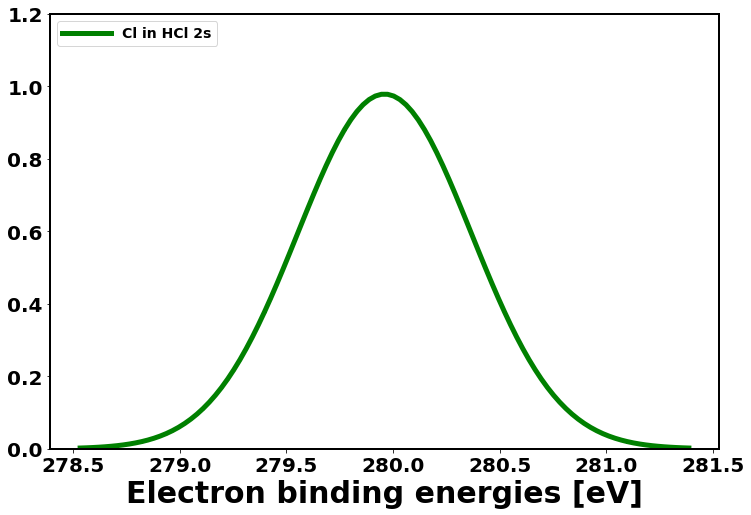

In [765]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2s with ccsd x2camf and acv3z basis set

Embedded_one_water_2s_hcl_acv3z_x2camf = df.Embedded_one_water_2s_hcl_acv3z_x2camf

Embedded_one_water_2s_hcl_acv3z_x2camf = np.array(Embedded_one_water_2s_hcl_acv3z_x2camf)
print(Embedded_one_water_2s_hcl_acv3z_x2camf)

mean_Embedded_one_water_2s_hcl_acv3z_x2camf = np.mean(Embedded_one_water_2s_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_2s_hcl_acv3z_x2camf =", mean_Embedded_one_water_2s_hcl_acv3z_x2camf)


std_Embedded_one_water_2s_hcl_acv3z_x2camf  = np.std(Embedded_one_water_2s_hcl_acv3z_x2camf)
print("std_Embedded_one_water_2s_hcl_acv3z_x2camf =", std_Embedded_one_water_2s_hcl_acv3z_x2camf)


Embedded_one_water_2s_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_2s_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_2s_hcl_acv3z_x2camf, mean_Embedded_one_water_2s_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_2s_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_2s_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_2s_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_2s_hcl_acv3z_x2camf, std_Embedded_one_water_2s_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2s', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[208.1643292 208.1999623 208.2355954 208.2712284 208.3068615 208.3424946
 208.3781276 208.4137607 208.4493938 208.4850268 208.5206599 208.556293
 208.591926  208.6275591 208.6631922 208.6988253 208.7344583 208.7700914
 208.8057245 208.8413575 208.8769906 208.9126237 208.9482567 208.9838898
 209.0195229]
mean_Embedded_one_water_p_hcl_acv3z_x2camf = 208.59192604800003
std_Embedded_one_water_p_hcl_acv3z_x2camf= 0.25695371531799255


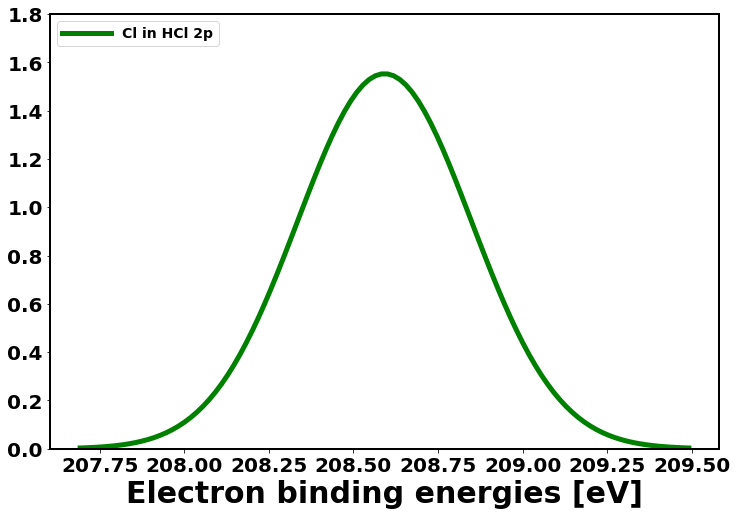

In [766]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p with ccsd x2camf and acv3z basis set

Embedded_one_water_p_hcl_acv3z_x2camf = df.Embedded_one_water_p_hcl_acv3z_x2camf

Embedded_one_water_p_hcl_acv3z_x2camf = np.array(Embedded_one_water_p_hcl_acv3z_x2camf)
print(Embedded_one_water_p_hcl_acv3z_x2camf)

mean_Embedded_one_water_p_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p_hcl_acv3z_x2camf =", mean_Embedded_one_water_p_hcl_acv3z_x2camf)


std_Embedded_one_water_p_hcl_acv3z_x2camf = np.std(Embedded_one_water_p_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p_hcl_acv3z_x2camf=", std_Embedded_one_water_p_hcl_acv3z_x2camf)


Embedded_one_water_p_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p_hcl_acv3z_x2camf, mean_Embedded_one_water_p_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p_hcl_acv3z_x2camf, std_Embedded_one_water_p_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p', linewidth=5)

plt.ylim([0.0, 1.8])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[208.7936417 209.4800372 209.3071886 209.7053557 209.9797743 208.6270105
 209.3314254 210.0784025 209.0799977 209.3914077 209.7396503 208.9415892
 208.9488861 209.8136982 209.6407394 209.1352913 209.9727958 208.9638095
 209.0816187 209.2924702 209.7876413 209.770771  210.0779872 209.1837108
 209.8735804]
mean_Embedded_one_water_p12_hcl_acv3z_x2camf = 209.43993922800001
std_Embedded_one_water_p12_hcl_acv3z_x2camf= 0.4202399761697674


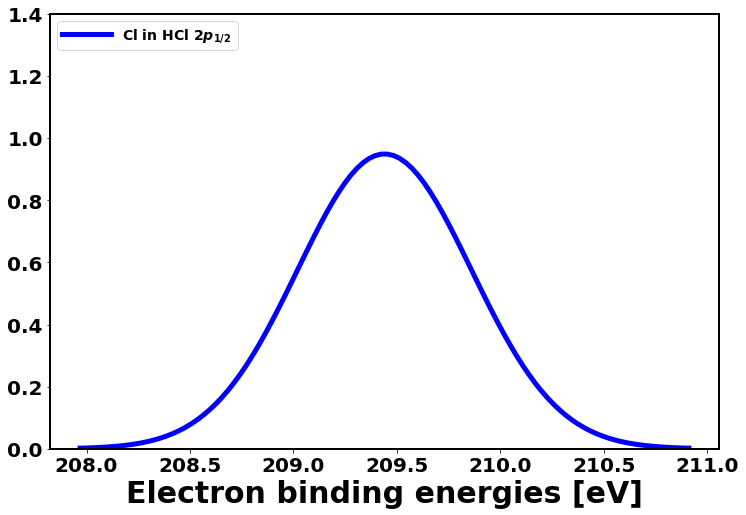

In [767]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p1/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p12_hcl_acv3z_x2camf = df.Embedded_one_water_p12_hcl_acv3z_x2camf

Embedded_one_water_p12_hcl_acv3z_x2camf = np.array(Embedded_one_water_p12_hcl_acv3z_x2camf)
print(Embedded_one_water_p12_hcl_acv3z_x2camf)

mean_Embedded_one_water_p12_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p12_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p12_hcl_acv3z_x2camf =", mean_Embedded_one_water_p12_hcl_acv3z_x2camf)


std_Embedded_one_water_p12_hcl_acv3z_x2camf = np.std(Embedded_one_water_p12_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p12_hcl_acv3z_x2camf=", std_Embedded_one_water_p12_hcl_acv3z_x2camf)


Embedded_one_water_p12_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p12_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p12_hcl_acv3z_x2camf, mean_Embedded_one_water_p12_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p12_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_hcl_acv3z_x2camf, std_Embedded_one_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 1.4])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[207.135107  207.7828504 207.6097577 208.0075707 208.2826372 206.9298876
 207.633817  208.3806232 207.3825659 207.6946072 208.0425532 207.2442722
 207.2518259 208.1164966 207.9415953 207.4382181 208.2743989 207.2669854
 207.3843734 207.5943544 208.089841  208.0727258 208.3802104 207.4849472
 208.1756004]
mean_Embedded_one_water_p32_hcl_acv3z_x2camf = 207.74391288400003
std_Embedded_one_water_p32_hcl_acv3z_x2camf= 0.41770655068484375


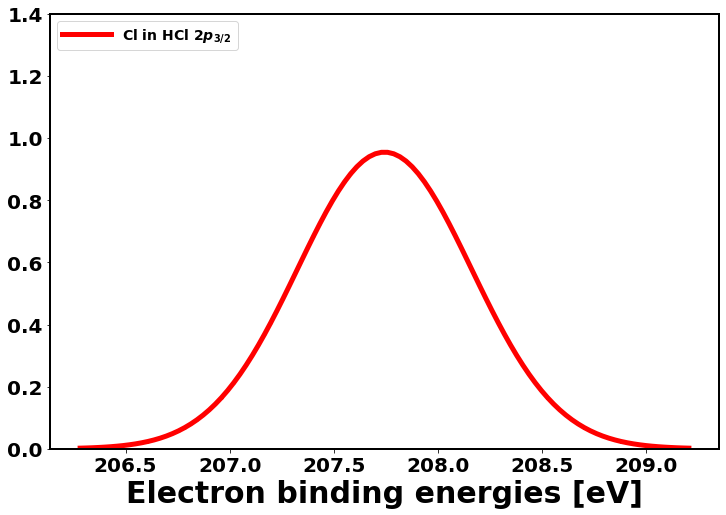

In [768]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p3/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p32_hcl_acv3z_x2camf = df.Embedded_one_water_p32_hcl_acv3z_x2camf

Embedded_one_water_p32_hcl_acv3z_x2camf = np.array(Embedded_one_water_p32_hcl_acv3z_x2camf)
print(Embedded_one_water_p32_hcl_acv3z_x2camf)

mean_Embedded_one_water_p32_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p32_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p32_hcl_acv3z_x2camf =", mean_Embedded_one_water_p32_hcl_acv3z_x2camf)


std_Embedded_one_water_p32_hcl_acv3z_x2camf = np.std(Embedded_one_water_p32_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p32_hcl_acv3z_x2camf=", std_Embedded_one_water_p32_hcl_acv3z_x2camf)


Embedded_one_water_p32_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p32_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p32_hcl_acv3z_x2camf, mean_Embedded_one_water_p32_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p32_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_hcl_acv3z_x2camf, std_Embedded_one_water_p32_hcl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)


plt.ylim([0.0, 1.4])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


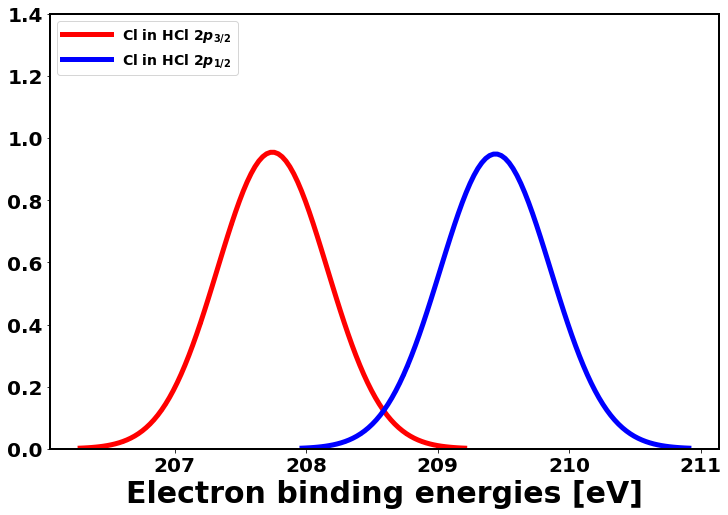

In [769]:

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_hcl_acv3z_x2camf, std_Embedded_one_water_p32_hcl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)
plt.plot(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_hcl_acv3z_x2camf, std_Embedded_one_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 1.4])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p12_32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


In [770]:
df = pd.read_excel('embedded_hcl_on_ice_zero_water_to_hcl_ccsd.xlsx', skiprows=3)
df.head()

,Unnamed: 0,Embedded_zero_water_1s_hcl_acv3z_x2camf,Unnamed: 2,Unnamed: 3,Unnamed: 4,Embedded_zero_water_2s_hcl_acv3z_x2camf,Unnamed: 6,Unnamed: 7,Unnamed: 8,Embedded_zero_water_p_hcl_acv3z_x2camf,Unnamed: 10,Unnamed: 11,Unnamed: 12,Embedded_zero_water_p12_hcl_acv3z_x2camf,Unnamed: 14,Unnamed: 15,Unnamed: 16,Embedded_zero_water_p32_hcl_acv3z_x2camf
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.986110,NaN,NaN,NaN,209.836291,NaN,NaN,NaN,208.135930
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.067076,NaN,NaN,NaN,209.916131,NaN,NaN,NaN,208.218021
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.049328,NaN,NaN,NaN,209.898233,NaN,NaN,NaN,208.200423
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.047456,NaN,NaN,NaN,209.896425,NaN,NaN,NaN,208.198487
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.043208,NaN,NaN,NaN,209.892832,NaN,NaN,NaN,208.193584


[208.9861103 209.0670757 209.0493278 209.0474557 209.043208  209.043439
 209.0437775 209.0366349 209.0701799 209.0791793 209.0668606 209.0774253
 209.0849548 209.0165938 209.0766281 209.0647634 209.0691998 209.040871
 209.069929  208.9969486 209.0774933 208.9320967 209.0523007 209.0781101
 209.0759896]
mean_Embedded_zero_water_p_hcl_acv3z_x2camf = 209.049862116
std_Embedded_zero_water_p_hcl_acv3z_x2camf = 0.03466291761942389


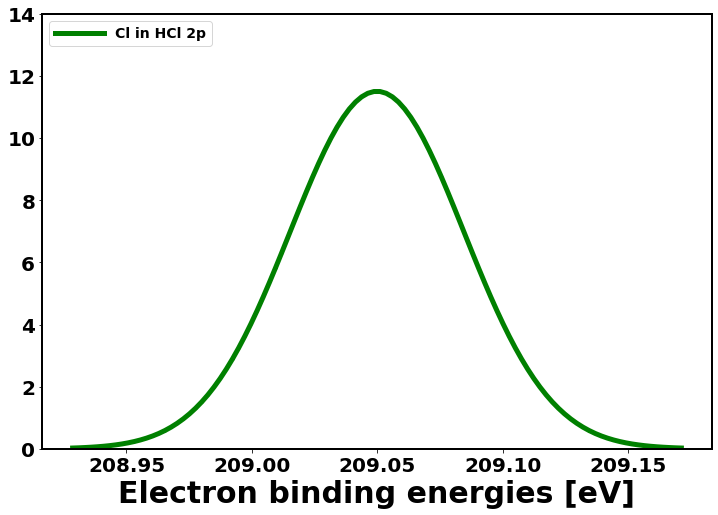

In [771]:
#HCl adsorbed on ice, zero water molecule added to the HCl : 2p with ccsd x2camf and acv3z basis set

Embedded_zero_water_p_hcl_acv3z_x2camf = df.Embedded_zero_water_p_hcl_acv3z_x2camf

Embedded_zero_water_p_hcl_acv3z_x2camf = np.array(Embedded_zero_water_p_hcl_acv3z_x2camf)
print(Embedded_zero_water_p_hcl_acv3z_x2camf)

mean_Embedded_zero_water_p_hcl_acv3z_x2camf = np.mean(Embedded_zero_water_p_hcl_acv3z_x2camf)
print("mean_Embedded_zero_water_p_hcl_acv3z_x2camf =", mean_Embedded_zero_water_p_hcl_acv3z_x2camf)


std_Embedded_zero_water_p_hcl_acv3z_x2camf = np.std(Embedded_zero_water_p_hcl_acv3z_x2camf)
print("std_Embedded_zero_water_p_hcl_acv3z_x2camf =", std_Embedded_zero_water_p_hcl_acv3z_x2camf)


Embedded_zero_water_p_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_zero_water_p_hcl_acv3z_x2camf - 3.5*std_Embedded_zero_water_p_hcl_acv3z_x2camf, mean_Embedded_zero_water_p_hcl_acv3z_x2camf + 3.5*std_Embedded_zero_water_p_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_zero_water_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_zero_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_zero_water_p_hcl_acv3z_x2camf, std_Embedded_zero_water_p_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p', linewidth=5)

plt.ylim([0.0, 14])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-0water_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



[209.8362907 209.9161305 209.898233  209.8964248 209.8928324 209.8922939
 209.892673  209.8855413 209.9192252 209.9282473 209.9160595 209.9264614
 209.93392   209.8655795 209.9255803 209.913607  209.9182377 209.8899372
 209.918657  209.845906  209.9264364 209.7817846 209.9013427 209.9271784
 209.9249295]
mean_Embedded_zero_water_p12_hcl_acv3z_x2camf = 209.89894037200003
std_Embedded_zero_water_p12_hcl_acv3z_x2camf = 0.03448170571604977


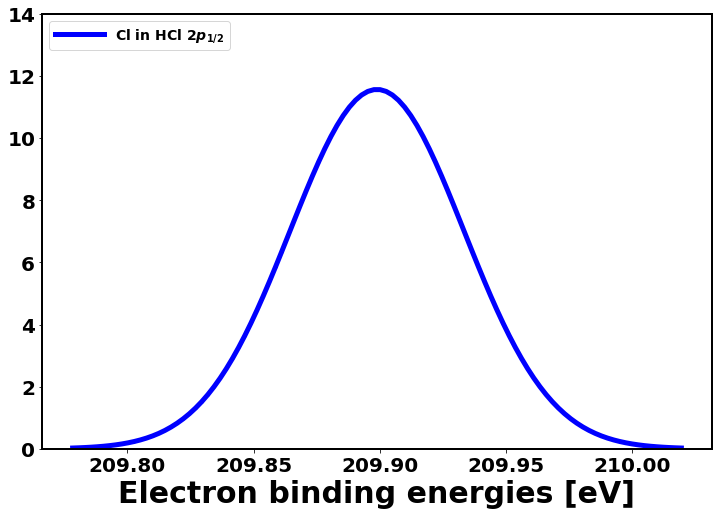

In [772]:
#HCl adsorbed on ice, zero water molecule added to the HCl : 2p1/2 with ccsd x2camf and acv3z basis set

Embedded_zero_water_p12_hcl_acv3z_x2camf = df.Embedded_zero_water_p12_hcl_acv3z_x2camf

Embedded_zero_water_p12_hcl_acv3z_x2camf = np.array(Embedded_zero_water_p12_hcl_acv3z_x2camf)
print(Embedded_zero_water_p12_hcl_acv3z_x2camf)

mean_Embedded_zero_water_p12_hcl_acv3z_x2camf = np.mean(Embedded_zero_water_p12_hcl_acv3z_x2camf)
print("mean_Embedded_zero_water_p12_hcl_acv3z_x2camf =", mean_Embedded_zero_water_p12_hcl_acv3z_x2camf)


std_Embedded_zero_water_p12_hcl_acv3z_x2camf = np.std(Embedded_zero_water_p12_hcl_acv3z_x2camf)
print("std_Embedded_zero_water_p12_hcl_acv3z_x2camf =", std_Embedded_zero_water_p12_hcl_acv3z_x2camf)


Embedded_zero_water_p12_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_zero_water_p12_hcl_acv3z_x2camf - 3.5*std_Embedded_zero_water_p12_hcl_acv3z_x2camf, mean_Embedded_zero_water_p12_hcl_acv3z_x2camf + 3.5*std_Embedded_zero_water_p12_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_zero_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_zero_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_zero_water_p12_hcl_acv3z_x2camf, std_Embedded_zero_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 14])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-0water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



[208.1359299 208.218021  208.2004225 208.1984865 208.1935836 208.194584
 208.194882  208.1877285 208.2211346 208.2301114 208.2176618 208.2283892
 208.2359896 208.1676081 208.2276758 208.2159199 208.2201618 208.1918048
 208.221201  208.1479913 208.2285503 208.0824088 208.2032587 208.2290418
 208.2270497]
mean_Embedded_zero_water_p32_hcl_acv3z_x2camf = 208.20078386400002
std_Embedded_zero_water_p32_hcl_acv3z_x2camf = 0.03484586093262634


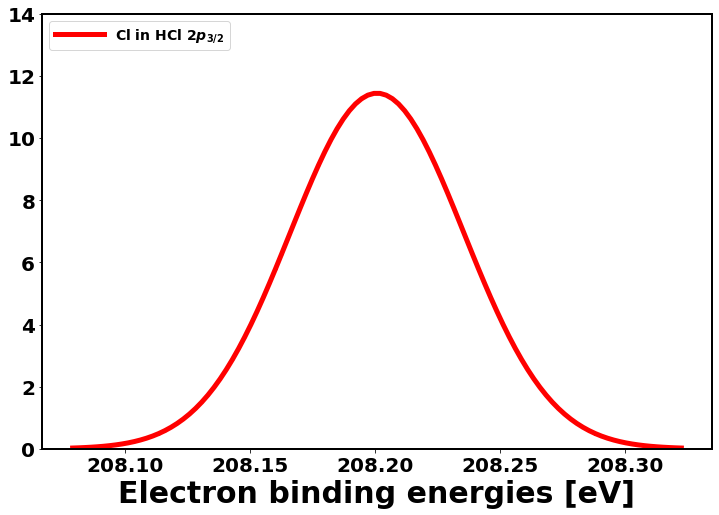

In [773]:
#HCl adsorbed on ice, zero water molecule added to the HCl : 2p1/2 and 2p3/2 with ccsd x2camf and acv3z basis set

Embedded_zero_water_p32_hcl_acv3z_x2camf = df.Embedded_zero_water_p32_hcl_acv3z_x2camf

Embedded_zero_water_p32_hcl_acv3z_x2camf = np.array(Embedded_zero_water_p32_hcl_acv3z_x2camf)
print(Embedded_zero_water_p32_hcl_acv3z_x2camf)

mean_Embedded_zero_water_p32_hcl_acv3z_x2camf = np.mean(Embedded_zero_water_p32_hcl_acv3z_x2camf)
print("mean_Embedded_zero_water_p32_hcl_acv3z_x2camf =", mean_Embedded_zero_water_p32_hcl_acv3z_x2camf)


std_Embedded_zero_water_p32_hcl_acv3z_x2camf = np.std(Embedded_zero_water_p32_hcl_acv3z_x2camf)
print("std_Embedded_zero_water_p32_hcl_acv3z_x2camf =", std_Embedded_zero_water_p32_hcl_acv3z_x2camf)


Embedded_zero_water_p32_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_zero_water_p32_hcl_acv3z_x2camf - 3.5*std_Embedded_zero_water_p32_hcl_acv3z_x2camf, mean_Embedded_zero_water_p32_hcl_acv3z_x2camf + 3.5*std_Embedded_zero_water_p32_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(Embedded_zero_water_p32_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_zero_water_p32_hcl_acv3z_x2camf_BE, mean_Embedded_zero_water_p32_hcl_acv3z_x2camf, std_Embedded_zero_water_p32_hcl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)

plt.ylim([0.0, 14])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-0water_ccsd-2p32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


Adjust to plot spin-orbit graph= [209.68592990000002, 209.768021, 209.7504225, 209.7484865, 209.74358360000002, 209.744584, 209.74488200000002, 209.7377285, 209.7711346, 209.7801114, 209.7676618, 209.77838920000002, 209.78598960000002, 209.7176081, 209.7776758, 209.7659199, 209.7701618, 209.7418048, 209.77120100000002, 209.6979913, 209.7785503, 209.6324088, 209.7532587, 209.77904180000002, 209.77704970000002]
209.750783864
0.034845860932626344


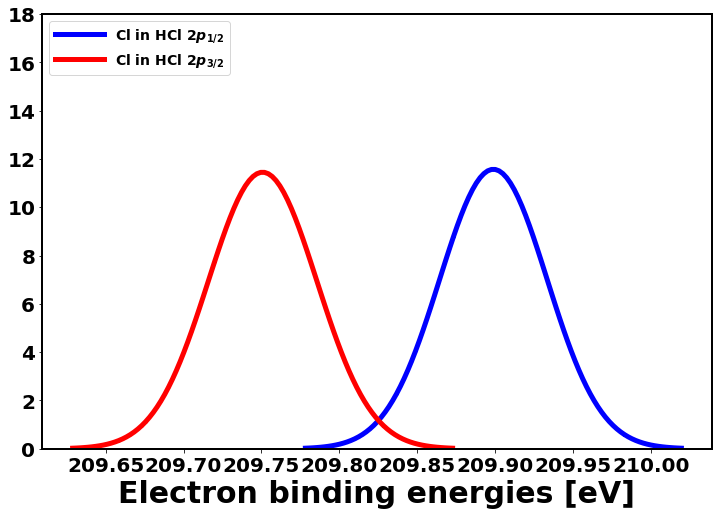

In [774]:
#HCl adsorbed on ice, zero water molecule added to the HCl : 2p1/2 and 2p3/2 with ccsd x2camf and acv3z basis set

adjust_for_spin_orbit = []

for i in Embedded_zero_water_p32_hcl_acv3z_x2camf:
    i+=1.55
    adjust_for_spin_orbit.append(i)
print("Adjust to plot spin-orbit graph=", adjust_for_spin_orbit)


mean_adjust_for_spin_orbit = np.mean(adjust_for_spin_orbit)
std_adjust_for_spin_orbit = np.std(adjust_for_spin_orbit)
print(mean_adjust_for_spin_orbit )
print(std_adjust_for_spin_orbit )


spin_x_32 =  np.linspace(mean_adjust_for_spin_orbit - 3.5*std_adjust_for_spin_orbit, mean_adjust_for_spin_orbit + 3.5*std_adjust_for_spin_orbit, 100)
#print(spin_x_32)


plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(Embedded_zero_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_zero_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_zero_water_p12_hcl_acv3z_x2camf, std_Embedded_zero_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)
plt.plot(spin_x_32, scipy.stats.norm.pdf(spin_x_32, mean_adjust_for_spin_orbit, std_adjust_for_spin_orbit), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)


plt.ylim([0.0, 18])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-0water_ccsd-2p12_32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



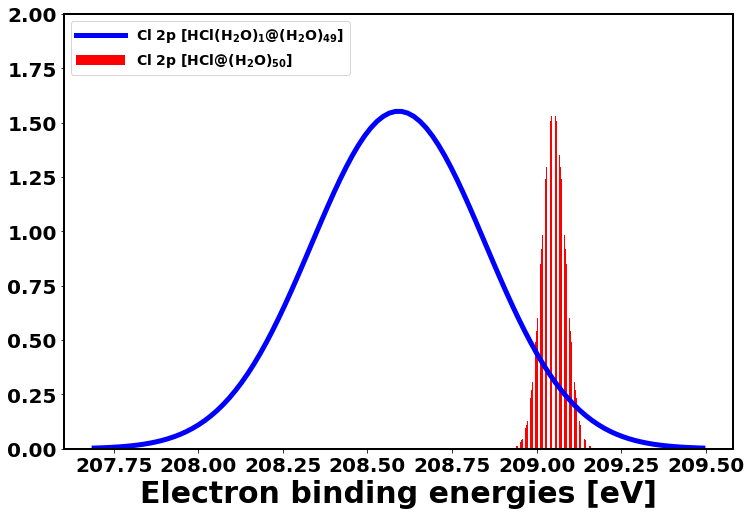

In [775]:
#HCl adsorbed on ice, comparison between zero and one water molecule added to the HCl: 2p  with ccsd x2camf and acv3z basis set


plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(Embedded_one_water_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p_hcl_acv3z_x2camf, std_Embedded_one_water_p_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl 2p [HCl(H$_{2}$O)$_{1}$@(H$_{2}$O)$_{49}$]', linewidth=5)
#plt.plot(Embedded_zero_water_p_hcl_acv3z_x2camf_BE,  scipy.stats.norm.pdf(Embedded_one_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p_hcl_acv3z_x2camf, std_Embedded_one_water_p_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p', linewidth=5)
plt.bar(Embedded_zero_water_p_hcl_acv3z_x2camf_BE,  scipy.stats.norm.pdf(Embedded_one_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p_hcl_acv3z_x2camf, std_Embedded_one_water_p_hcl_acv3z_x2camf), width=0.0013, color='r', align='center',label='Cl 2p [HCl@(H$_{2}$O)$_{50}$]')

plt.ylim([0.0, 2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice-zero_n_one_wateradded_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


In [776]:
df = pd.read_excel('embedded_cl_in_1st_layer_of_ice_single_water_to_cl_ccsd.xlsx', skiprows=3)
df.head()

,Unnamed: 0,Embedded_one_water_1s_cl_acv3z_x2camf,Unnamed: 2,Unnamed: 3,Unnamed: 4,Embedded_one_water_2s_cl_acv3z_x2camf,Unnamed: 6,Unnamed: 7,Unnamed: 8,Embedded_one_water_p_cl_acv3z_x2camf,Unnamed: 10,Unnamed: 11,Unnamed: 12,Embedded_one_water_p12_cl_acv3z_x2camf,Unnamed: 14,Unnamed: 15,Unnamed: 16,Embedded_one_water_p32_cl_acv3z_x2camf
0,NaN,2833.047536,NaN,NaN,NaN,275.497993,NaN,NaN,NaN,204.091483,NaN,NaN,NaN,204.938942,NaN,NaN,NaN,203.244024
1,NaN,2832.579540,NaN,NaN,NaN,275.066909,NaN,NaN,NaN,203.657737,NaN,NaN,NaN,204.505072,NaN,NaN,NaN,202.810401
2,NaN,2832.928900,NaN,NaN,NaN,275.419134,NaN,NaN,NaN,204.009885,NaN,NaN,NaN,204.857209,NaN,NaN,NaN,203.162560
3,NaN,2828.343787,NaN,NaN,NaN,270.929291,NaN,NaN,NaN,199.545894,NaN,NaN,NaN,200.393368,NaN,NaN,NaN,198.698419
4,NaN,2832.957953,NaN,NaN,NaN,275.437902,NaN,NaN,NaN,204.029431,NaN,NaN,NaN,204.876799,NaN,NaN,NaN,203.182063


[2833.047536 2832.57954  2832.9289   2828.343787 2832.957953 2831.458479
 2832.355854 2832.491764 2832.604402 2831.759719 2831.646671 2831.613331
 2831.926044 2832.713816 2832.956945 2832.223629 2831.873604 2830.807387
 2832.952127 2833.336193 2831.598105 2830.813108 2832.713597 2832.348624
 2832.69768 ]
mean_Embedded_one_water_1s_cl_acv3z_x2camf = 2832.1099518
std_Embedded_one_water_1s_cl_acv3z_x2camf = 1.018572542110004


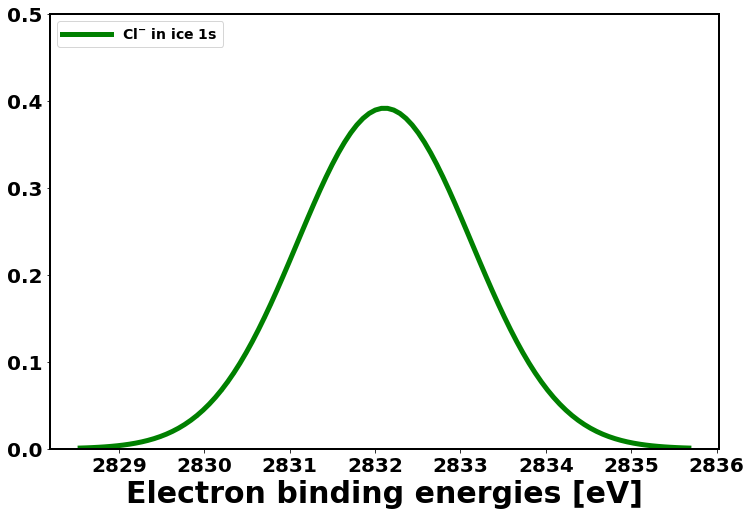

In [777]:
#Cl- adsorbed on ice, one water molecule added to the Cl : 1s with ccsd x2camf and acv3z basis set

Embedded_one_water_1s_cl_acv3z_x2camf = df.Embedded_one_water_1s_cl_acv3z_x2camf

Embedded_one_water_1s_cl_acv3z_x2camf = np.array(Embedded_one_water_1s_cl_acv3z_x2camf)
print(Embedded_one_water_1s_cl_acv3z_x2camf)

mean_Embedded_one_water_1s_cl_acv3z_x2camf = np.mean(Embedded_one_water_1s_cl_acv3z_x2camf)
print("mean_Embedded_one_water_1s_cl_acv3z_x2camf =", mean_Embedded_one_water_1s_cl_acv3z_x2camf)



std_Embedded_one_water_1s_cl_acv3z_x2camf  = np.std(Embedded_one_water_1s_cl_acv3z_x2camf)
print("std_Embedded_one_water_1s_cl_acv3z_x2camf =", std_Embedded_one_water_1s_cl_acv3z_x2camf)


Embedded_one_water_1s_cl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_1s_cl_acv3z_x2camf - 3.5*std_Embedded_one_water_1s_cl_acv3z_x2camf, mean_Embedded_one_water_1s_cl_acv3z_x2camf + 3.5*std_Embedded_one_water_1s_cl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_1s_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_1s_cl_acv3z_x2camf_BE, mean_Embedded_one_water_1s_cl_acv3z_x2camf, std_Embedded_one_water_1s_cl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 1s', linewidth=5)

plt.ylim([0.0, 0.5])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-1s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[275.4979932 275.0669089 275.4191343 270.9292913 275.4379023 273.8957053
 274.8399855 274.9419723 275.0737242 274.2106095 274.0824209 274.0588105
 274.4109771 275.1793494 275.4450634 274.6794096 274.3232581 273.173817
 275.4335426 275.8351557 274.0310264 273.1975086 275.2059661 274.8558041
 275.1720938]
mean_Embedded_one_water_2s_cl_acv3z_x2camf = 274.575897204
std_Embedded_one_water_2s_cl_acv3z_x2camf = 1.0185843898530937


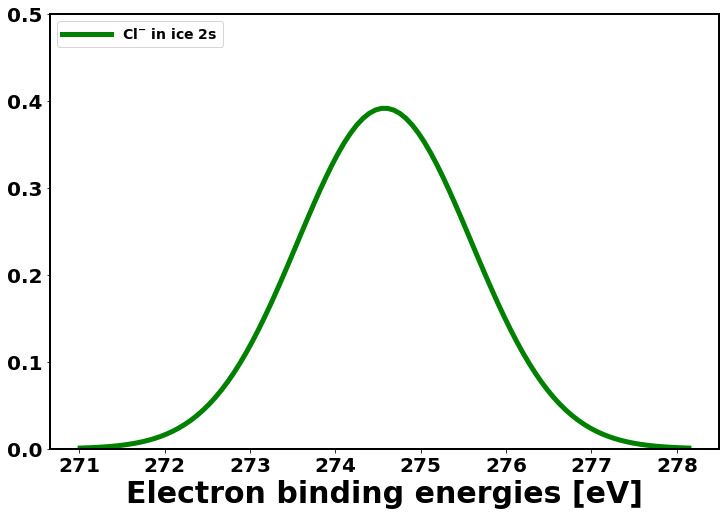

In [778]:
#Cl- adsorbed on ice, one water molecule added to the Cl : 2s with ccsd x2camf and acv3z basis set

Embedded_one_water_2s_cl_acv3z_x2camf = df.Embedded_one_water_2s_cl_acv3z_x2camf

Embedded_one_water_2s_cl_acv3z_x2camf = np.array(Embedded_one_water_2s_cl_acv3z_x2camf)
print(Embedded_one_water_2s_cl_acv3z_x2camf)

mean_Embedded_one_water_2s_cl_acv3z_x2camf = np.mean(Embedded_one_water_2s_cl_acv3z_x2camf)
print("mean_Embedded_one_water_2s_cl_acv3z_x2camf =", mean_Embedded_one_water_2s_cl_acv3z_x2camf)



std_Embedded_one_water_2s_cl_acv3z_x2camf  = np.std(Embedded_one_water_2s_cl_acv3z_x2camf)
print("std_Embedded_one_water_2s_cl_acv3z_x2camf =", std_Embedded_one_water_2s_cl_acv3z_x2camf)


Embedded_one_water_2s_cl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_2s_cl_acv3z_x2camf - 3.5*std_Embedded_one_water_2s_cl_acv3z_x2camf, mean_Embedded_one_water_2s_cl_acv3z_x2camf + 3.5*std_Embedded_one_water_2s_cl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_2s_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_2s_cl_acv3z_x2camf_BE, mean_Embedded_one_water_2s_cl_acv3z_x2camf, std_Embedded_one_water_2s_cl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2s', linewidth=5)

plt.ylim([0.0, 0.5])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-2s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



[204.0914833 203.6577367 204.0098847 199.5458936 204.0294309 202.4906579
 203.431316  203.5357911 203.6657251 202.8041799 202.6769942 202.6525096
 203.0020251 203.7719245 204.0359254 203.2728849 202.9165852 201.8122231
 204.0247358 204.4249489 202.625658  201.8342351 203.7964486 203.4451875
 203.7639918]
mean_Embedded_one_water_p_cl_acv3z_x2camf = 203.17273507600004
std_Embedded_one_water_p_cl_acv3z_x2camf = 1.0096489779612576


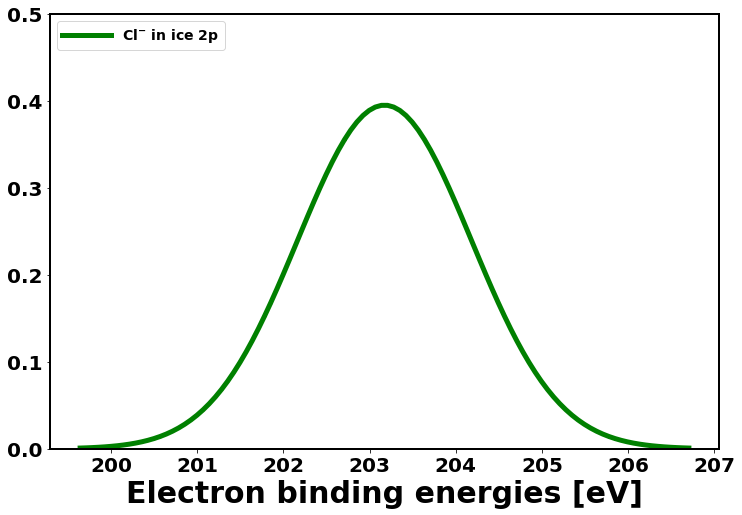

In [779]:
#Cl- adsorbed on ice, one water molecule added to the Cl : 2p with ccsd x2camf and acv3z basis set

Embedded_one_water_p_cl_acv3z_x2camf = df.Embedded_one_water_p_cl_acv3z_x2camf

Embedded_one_water_p_cl_acv3z_x2camf = np.array(Embedded_one_water_p_cl_acv3z_x2camf)
print(Embedded_one_water_p_cl_acv3z_x2camf)

mean_Embedded_one_water_p_cl_acv3z_x2camf = np.mean(Embedded_one_water_p_cl_acv3z_x2camf)
print("mean_Embedded_one_water_p_cl_acv3z_x2camf =", mean_Embedded_one_water_p_cl_acv3z_x2camf)



std_Embedded_one_water_p_cl_acv3z_x2camf  = np.std(Embedded_one_water_p_cl_acv3z_x2camf)
print("std_Embedded_one_water_p_cl_acv3z_x2camf =", std_Embedded_one_water_p_cl_acv3z_x2camf)


Embedded_one_water_p_cl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p_cl_acv3z_x2camf - 3.5*std_Embedded_one_water_p_cl_acv3z_x2camf, mean_Embedded_one_water_p_cl_acv3z_x2camf + 3.5*std_Embedded_one_water_p_cl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p_cl_acv3z_x2camf_BE, mean_Embedded_one_water_p_cl_acv3z_x2camf, std_Embedded_one_water_p_cl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2p', linewidth=5)

plt.ylim([0.0, 0.5])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



[204.9389423 204.5050721 204.8572089 200.3933681 204.8767986 203.3381681
 204.2786565 204.3832354 204.51311   203.6516271 203.5245039 203.4999895
 203.8493736 204.6193241 204.8832531 204.1203094 203.7640649 202.6598618
 204.8720876 205.2722474 203.4732112 202.6817923 204.6437731 204.2924827
 204.6113561]
mean_Embedded_one_water_p12_cl_acv3z_x2camf = 204.02015271200003
std_Embedded_one_water_p12_cl_acv3z_x2camf = 1.0095899727092732


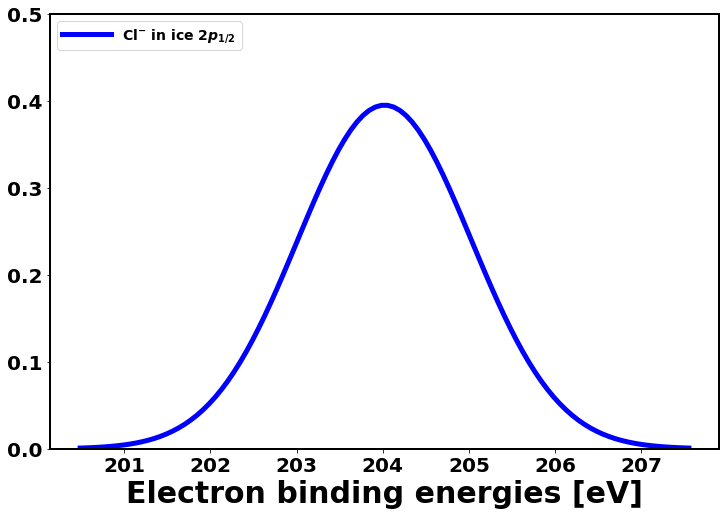

In [780]:
#Cl- adsorbed on ice, one water molecule added to the Cl : 2p1/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p12_cl_acv3z_x2camf = df.Embedded_one_water_p12_cl_acv3z_x2camf

Embedded_one_water_p12_cl_acv3z_x2camf = np.array(Embedded_one_water_p12_cl_acv3z_x2camf)
print(Embedded_one_water_p12_cl_acv3z_x2camf)

mean_Embedded_one_water_p12_cl_acv3z_x2camf = np.mean(Embedded_one_water_p12_cl_acv3z_x2camf)
print("mean_Embedded_one_water_p12_cl_acv3z_x2camf =", mean_Embedded_one_water_p12_cl_acv3z_x2camf)



std_Embedded_one_water_p12_cl_acv3z_x2camf  = np.std(Embedded_one_water_p12_cl_acv3z_x2camf)
print("std_Embedded_one_water_p12_cl_acv3z_x2camf =", std_Embedded_one_water_p12_cl_acv3z_x2camf)


Embedded_one_water_p12_cl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p12_cl_acv3z_x2camf - 3.5*std_Embedded_one_water_p12_cl_acv3z_x2camf, mean_Embedded_one_water_p12_cl_acv3z_x2camf + 3.5*std_Embedded_one_water_p12_cl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p12_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_cl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_cl_acv3z_x2camf, std_Embedded_one_water_p12_cl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 0.5])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



[203.2440243 202.8104013 203.1625604 198.6984192 203.1820632 201.6431476
 202.5839755 202.6883469 202.8183402 201.9567326 201.8294846 201.8050296
 202.1546766 202.924525  203.1885977 202.4254604 202.0691055 200.9645843
 203.177384  203.5776505 201.7781049 200.9866779 202.949124  202.5978923
 202.9166276]
mean_Embedded_one_water_p32_cl_acv3z_x2camf = 202.325317444
std_Embedded_one_water_p32_cl_acv3z_x2camf = 1.009707986181988


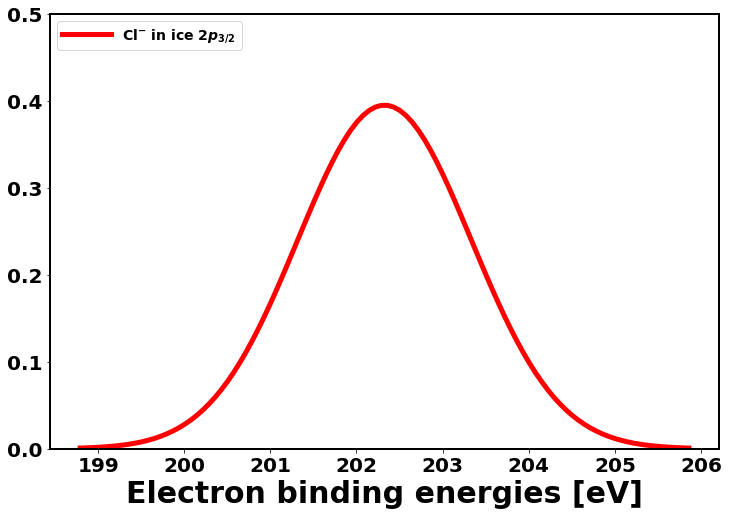

In [781]:
#Cl- adsorbed on ice, one water molecule added to the Cl : 2p3/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p32_cl_acv3z_x2camf = df.Embedded_one_water_p32_cl_acv3z_x2camf

Embedded_one_water_p32_cl_acv3z_x2camf = np.array(Embedded_one_water_p32_cl_acv3z_x2camf)
print(Embedded_one_water_p32_cl_acv3z_x2camf)

mean_Embedded_one_water_p32_cl_acv3z_x2camf = np.mean(Embedded_one_water_p32_cl_acv3z_x2camf)
print("mean_Embedded_one_water_p32_cl_acv3z_x2camf =", mean_Embedded_one_water_p32_cl_acv3z_x2camf)



std_Embedded_one_water_p32_cl_acv3z_x2camf = np.std(Embedded_one_water_p32_cl_acv3z_x2camf)
print("std_Embedded_one_water_p32_cl_acv3z_x2camf =", std_Embedded_one_water_p32_cl_acv3z_x2camf)


Embedded_one_water_p32_cl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p32_cl_acv3z_x2camf - 3.5*std_Embedded_one_water_p32_cl_acv3z_x2camf, mean_Embedded_one_water_p32_cl_acv3z_x2camf + 3.5*std_Embedded_one_water_p32_cl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p32_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_cl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_cl_acv3z_x2camf, std_Embedded_one_water_p32_cl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2$p_{3/2}$', linewidth=5)

plt.ylim([0.0, 0.5])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-2p32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()



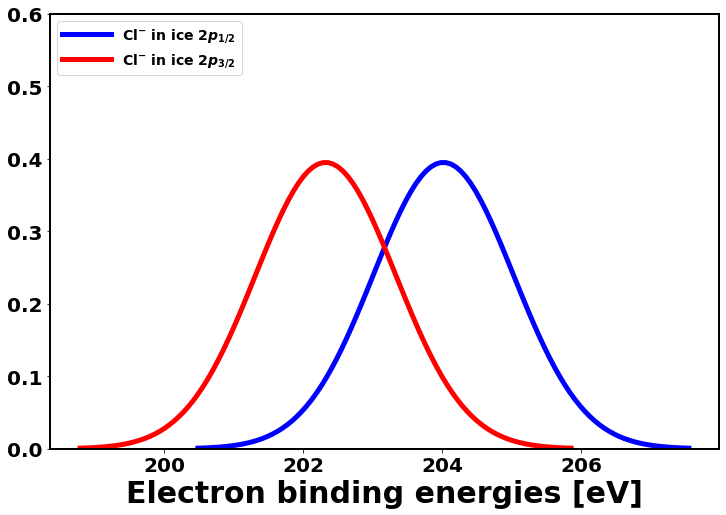

In [782]:
plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(Embedded_one_water_p12_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_cl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_cl_acv3z_x2camf, std_Embedded_one_water_p12_cl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2$p_{1/2}$', linewidth=5)
plt.plot(Embedded_one_water_p32_cl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_cl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_cl_acv3z_x2camf, std_Embedded_one_water_p32_cl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl$^{-}$ in ice 2$p_{3/2}$', linewidth=5)

plt.ylim([0.0, 0.6])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl_in_ice_50-1water_ccsd-2p12_32.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

